In [31]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import pandas as pd
import re
import networkx as nx
import os

In [33]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
# Summarized Text Function
def read_article(file_name):
    file = open(file_name, 'r')
    filedata = file.read()
    article = filedata.split('. ')
    sentences = []
    for sentence in article:
        sentences.append(sentence.replace('[^a-zA-Z\s]', ' ').split())
    sentences.pop()
    return sentences

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
    return 1 - cosine_distance(vector1, vector2)

def generate_similarity_matrix(sentences, stop_words):
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2:
                continue
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)
    return similarity_matrix

def generate_summary(file_name, top_n):
    stop_words = set(stopwords.words('indonesian'))
    summarize_text = []
    sentences = read_article(file_name)
    if len(sentences) >= 3:
      top_n = 3
    else:
      top_n = len(sentences)

    sentence_similarity_matrix = generate_similarity_matrix(sentences, stop_words)
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)
    ranked_sentence = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))
    return ". ".join(summarize_text)

In [35]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [36]:
input_file = '/content/drive/MyDrive/[CAPSTONE OASEE]/[ML]/[2.1] Dataset/Combined /combined_1800_data_summary.csv'

In [37]:
# Read the input CSV file
df = pd.read_csv(input_file, encoding='utf-8')
df

,Title,Timestamp,FullText,Tags,Author,Url,Label
0,NTT Optimistis Persentase Anak Stunting Turun ...,"Kompas.com - 17/05/2023, 22:55 WIB",KOMPAS.com ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ P...,NTT;stunting;SDG02-Tanpa Kelaparan;SDG06-Air B...,Penulis Danur Lambang Pristiandaru | Editor Da...,http://lestari.kompas.com/read/2023/05/17/2255...,0
1,"Kemenperin: Industri Manufaktur Sumbang 70,21 ...","Kompas.com - 17/05/2023, 21:00 WIB",JAKARTA KOMPAS.com Kementerian Perindustrian...,Ekspor;Kemenperin;industri manufaktur,Penulis Haryanti Puspa Sari | Editor Akhdi Mar...,http://money.kompas.com/read/2023/05/17/210000...,0
2,"Tingkatkan Daya Saing Nasional, Industri Hijau...","Kompas.com - 17/05/2023, 17:00 WIB",KOMPAS.com Menteri Perindustrian Menperin Ag...,industri hijau;SDG08-Pekerjaan Layak dan Pertu...,Penulis Danur Lambang Pristiandaru | Editor Da...,http://lestari.kompas.com/read/2023/05/17/1700...,0
3,Ganjil Genap di Jalur Puncak Berlaku Mulai Har...,"Kompas.com - 17/05/2023, 15:20 WIB",JAKARTA KOMPAS.com Untuk mencegah terjadinya...,ganjil genap;libur nasional;polres bogor;Kawas...,Penulis Donny Dwisatryo Priyantoro | Editor Az...,http://otomotif.kompas.com/read/2023/05/17/152...,0
4,Daftar Lengkap 54 Taman Nasional di Indonesia,"Kompas.com - 17/05/2023, 15:00 WIB",KOMPAS.com ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ I...,Taman Nasional;SDG14-Ekosistem Lautan;SDG15-Ek...,Penulis Danur Lambang Pristiandaru | Editor Da...,http://lestari.kompas.com/read/2023/05/17/1500...,0
...,...,...,...,...,...,...,...
1795,[SALAH] Foto Anies sedang Makan di Warung Sede...,NaN,Hasil Periksa Fakta Luthfiyah OJ UIN Raden Mas...,NaN,NaN,https://turnbackhoax.id/2023/01/09/salah-foto-...,1
1796,[SALAH] “MERENDAM KAKI MENGGUNAKAN MINYAK TANA...,NaN,Hasil periksa fakta Yudho ardiInformasi yang s...,NaN,NaN,https://turnbackhoax.id/2023/01/09/salah-meren...,1
1797,[SALAH] Lesty Meninggal Dunia Dibunuh Orang Ta...,NaN,Hasil periksa fakta Agnes Amungkasari.Video de...,NaN,NaN,https://turnbackhoax.id/2023/01/09/salah-lesty...,1
1798,[SALAH] Anies Baswedan Berselingkuh dengan Dhe...,NaN,Hasil periksa fakta Agnes Amungkasari.Video de...,NaN,NaN,https://turnbackhoax.id/2023/01/09/salah-anies...,1


In [38]:
# Create an empty column for summaries
df['Summary'] = ''
rows_deleted = []
i = 0

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    try:
        # Get the text from the 'FullText' column
        text = row['FullText']

        # Create a temporary file to store the text
        input_file = f'dataset_{index}.txt'
        with open(input_file, 'w') as file:
            file.write(text)

        # Generate the summary for the input file
        file_summary = generate_summary(input_file, 3)

        # Update the 'Summary' column with the generated summary
        if file_summary is not None:
            df.at[index, 'Summary'] = file_summary

        # Remove the temporary input file
        os.remove(input_file)

    except Exception as e:
        print(f"Error processing row {index}: {e}")
        rows_deleted.append(index)
        i += 1
        continue

# Save the DataFrame with the updated 'Summary' column to a new CSV file
print(f"\nSebanyak {i} data dihapus :")
print(rows_deleted)
df.drop(rows_deleted, inplace=True)

df.to_csv('data_with_summary.csv', index=False)

/usr/local/lib/python3.10/dist-packages/nltk/cluster/util.py:130: RuntimeWarning: invalid value encountered in true_divide
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


Error processing row 65: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Error processing row 216: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Error processing row 248: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Error processing row 262: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Error processing row 510: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Error processing row 555: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Error processing row 600: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Error processing row 631: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
E

In [39]:
output = pd.read_csv('data_with_summary.csv')
output

,Title,Timestamp,FullText,Tags,Author,Url,Label,Summary
0,NTT Optimistis Persentase Anak Stunting Turun ...,"Kompas.com - 17/05/2023, 22:55 WIB",KOMPAS.com ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ P...,NTT;stunting;SDG02-Tanpa Kelaparan;SDG06-Air B...,Penulis Danur Lambang Pristiandaru | Editor Da...,http://lestari.kompas.com/read/2023/05/17/2255...,0,Bila dibandingkan laporan anak stunting terseb...
1,"Kemenperin: Industri Manufaktur Sumbang 70,21 ...","Kompas.com - 17/05/2023, 21:00 WIB",JAKARTA KOMPAS.com Kementerian Perindustrian...,Ekspor;Kemenperin;industri manufaktur,Penulis Haryanti Puspa Sari | Editor Akhdi Mar...,http://money.kompas.com/read/2023/05/17/210000...,0,Febri juga mengatakan sektor industri pengolah...
2,"Tingkatkan Daya Saing Nasional, Industri Hijau...","Kompas.com - 17/05/2023, 17:00 WIB",KOMPAS.com Menteri Perindustrian Menperin Ag...,industri hijau;SDG08-Pekerjaan Layak dan Pertu...,Penulis Danur Lambang Pristiandaru | Editor Da...,http://lestari.kompas.com/read/2023/05/17/1700...,0,KOMPAS.com Menteri Perindustrian Menperin Agus...
3,Ganjil Genap di Jalur Puncak Berlaku Mulai Har...,"Kompas.com - 17/05/2023, 15:20 WIB",JAKARTA KOMPAS.com Untuk mencegah terjadinya...,ganjil genap;libur nasional;polres bogor;Kawas...,Penulis Donny Dwisatryo Priyantoro | Editor Az...,http://otomotif.kompas.com/read/2023/05/17/152...,0,Jadi mulai Rabu 1752023 hingga Minggu 2152023 ...
4,Daftar Lengkap 54 Taman Nasional di Indonesia,"Kompas.com - 17/05/2023, 15:00 WIB",KOMPAS.com ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ I...,Taman Nasional;SDG14-Ekosistem Lautan;SDG15-Ek...,Penulis Danur Lambang Pristiandaru | Editor Da...,http://lestari.kompas.com/read/2023/05/17/1500...,0,Kawasan pelestarian ini berfungsi melindungi t...
...,...,...,...,...,...,...,...,...
1767,[SALAH] Foto Anies sedang Makan di Warung Sede...,NaN,Hasil Periksa Fakta Luthfiyah OJ UIN Raden Mas...,NaN,NaN,https://turnbackhoax.id/2023/01/09/salah-foto-...,1,Dalam foto tersebut juga terdapat narasi yang ...
1768,[SALAH] “MERENDAM KAKI MENGGUNAKAN MINYAK TANA...,NaN,Hasil periksa fakta Yudho ardiInformasi yang s...,NaN,NaN,https://turnbackhoax.id/2023/01/09/salah-meren...,1,Ari sebagai guru besar departemen penyakit dal...
1769,[SALAH] Lesty Meninggal Dunia Dibunuh Orang Ta...,NaN,Hasil periksa fakta Agnes Amungkasari.Video de...,NaN,NaN,https://turnbackhoax.id/2023/01/09/salah-lesty...,1,Hingga saat ini Lesty yang dikenal sebagai pen...
1770,[SALAH] Anies Baswedan Berselingkuh dengan Dhe...,NaN,Hasil periksa fakta Agnes Amungkasari.Video de...,NaN,NaN,https://turnbackhoax.id/2023/01/09/salah-anies...,1,Faktanya keduanya tidak pernah terlihat bersam...


In [41]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Attention
from tensorflow.keras.callbacks import ModelCheckpoint

# Step 1: Prepare the dataset
df = pd.read_csv("data_with_summary.csv")

train_size = int(0.8 * len(df))
train_df = df[:train_size]
valid_df = df[train_size:]

# Step 2: Prepare the input and output data
input_texts = train_df['FullText'].tolist()
target_texts = train_df['Summary'].tolist()

input_texts = [text for text in input_texts if isinstance(text, str) and text.strip()]
target_texts = [text for text in target_texts if isinstance(text, str) and text.strip()]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_texts + target_texts)

encoder_input_data = tokenizer.texts_to_sequences(input_texts)
decoder_input_data = tokenizer.texts_to_sequences(target_texts)

encoder_input_length = max(len(seq) for seq in encoder_input_data)
decoder_input_length = max(len(seq) for seq in decoder_input_data)

encoder_input_data = pad_sequences(encoder_input_data, maxlen=encoder_input_length, padding='post')
decoder_input_data = pad_sequences(decoder_input_data, maxlen=decoder_input_length, padding='post')

decoder_target_data = np.zeros((len(decoder_input_data), decoder_input_length), dtype=np.int32)
for i, seq in enumerate(decoder_input_data):
    decoder_target_data[i, :-1] = seq[1:]

# Ensure the sizes of encoder and decoder data match
num_samples = min(encoder_input_data.shape[0], decoder_target_data.shape[0])
encoder_input_data = encoder_input_data[:num_samples]
decoder_input_data = decoder_input_data[:num_samples]
decoder_target_data = decoder_target_data[:num_samples]

num_words = len(tokenizer.word_index) + 1

# Step 3: Build the model architecture
def build_model(encoder_input_length, decoder_input_length, num_words, embedding_dim, lstm_units):
    inputs = Input(shape=(encoder_input_length,))
    targets = Input(shape=(decoder_input_length,))

    embedding = Embedding(input_dim=num_words, output_dim=embedding_dim)
    encoder_lstm = LSTM(units=lstm_units, return_sequences=True, return_state=True)
    decoder_lstm = LSTM(units=lstm_units, return_sequences=True, return_state=True)
    attention = Attention()

    encoder_inputs = embedding(inputs)
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
    encoder_states = [state_h, state_c]

    decoder_inputs = embedding(targets)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    attention_output = attention([decoder_outputs, encoder_outputs])
    outputs = Dense(units=num_words, activation='softmax')(attention_output)

    model = Model([inputs, targets], outputs)
    return model

embedding_dim = 100
lstm_units = 128

model = build_model(encoder_input_length, decoder_input_length, num_words, embedding_dim, lstm_units)

# Step 4: Train the model
batch_size = 32
epochs = 10

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_summary.h5', save_best_only=True)

history = model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[checkpoint]
)

Epoch 1/10
36/36 [==============================] - 81s 607ms/step - loss: 7.7784 - accuracy: 0.7450 - val_loss: 4.0735 - val_accuracy: 0.7159
Epoch 2/10
36/36 [==============================] - 22s 619ms/step - loss: 2.6303 - accuracy: 0.7669 - val_loss: 2.8993 - val_accuracy: 0.7159
Epoch 3/10
36/36 [==============================] - 19s 520ms/step - loss: 2.3729 - accuracy: 0.7669 - val_loss: 2.8647 - val_accuracy: 0.7159
Epoch 4/10
36/36 [==============================] - 20s 569ms/step - loss: 2.3644 - accuracy: 0.7669 - val_loss: 2.8708 - val_accuracy: 0.7159
Epoch 5/10
36/36 [==============================] - 17s 472ms/step - loss: 2.3623 - accuracy: 0.7669 - val_loss: 2.8828 - val_accuracy: 0.7159
Epoch 6/10
36/36 [==============================] - 18s 505ms/step - loss: 2.3610 - accuracy: 0.7669 - val_loss: 2.8872 - val_accuracy: 0.7159
Epoch 7/10
36/36 [==============================] - 19s 521ms/step - loss: 2.3603 - accuracy: 0.7669 - val_loss: 2.8952 - val_accuracy: 0.7159

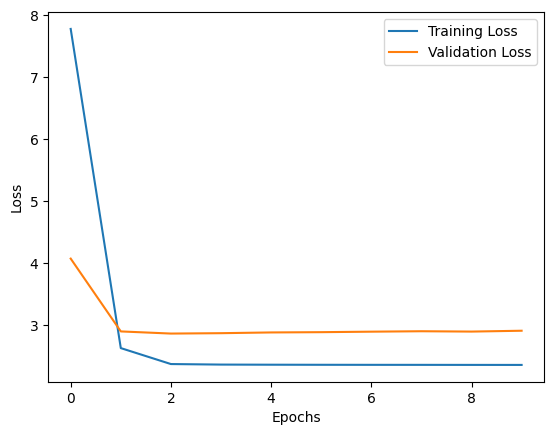

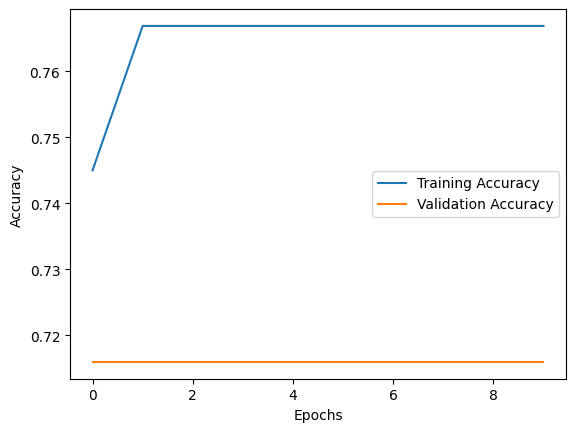

In [42]:
import matplotlib.pyplot as plt

# Plotting the learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
model.save('model_summary.h5')